In [4]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns
pd.set_option('display.max_columns', None)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [6]:
# %%R

# install.packages("zoo")

In [7]:
%%R 

require('tidyverse')
require('tidyr')
require('stringr')
require('zoo')
require('dplyr')


R[write to console]: Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


R[write to console]: Loading required package: zoo

R[write to console]: 
Attaching package: ‘zoo’


R[write to console]: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




# Load and clean data

In [8]:
# Load data

points = pd.read_csv('points.csv')
display(points.head(5))

fees = pd.read_csv('fees.csv')
display(fees.head(5))



,Squad,Pts_2023,Pts_2022,Pts_2021,Pts_2020,Pts_2019,Pts_2018,Pts_2017,Pts_2016,Pts_2015,Pts_2014,Pts_2013,Pts_2012,Pts_2011,Pts_2010,Pts_2009,Pts_2008,Pts_2007,Pts_2006,Pts_2005,Pts_2004,Pts_2003,Pts_2002,Pts_2001,Pts_2000,Pts_1999,Pts_1998,Pts_1997,Pts_1996,Pts_1995,Pts_1994,Pts_1993,Pts_1992,Total_Pts
0,Arsenal,81.0,69.0,61.0,56.0,70.0,63.0,75.0,71.0,75.0,79.0,73.0,70.0,68.0,75.0,72.0,83.0,68.0,67.0,83.0,90.0,78.0,87.0,70.0,73.0,78.0,78.0,68.0,63.0,51.0,71.0,56.0,72.0,2294.0
1,Aston Villa,54.0,45.0,55.0,35.0,NaN,NaN,NaN,17.0,38.0,38.0,41.0,38.0,48.0,64.0,62.0,60.0,50.0,42.0,47.0,56.0,45.0,50.0,54.0,58.0,55.0,57.0,61.0,63.0,48.0,57.0,74.0,60.0,1472.0
2,Bournemouth,39.0,NaN,NaN,34.0,45.0,44.0,46.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0
3,Brentford,50.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0
4,Brighton,55.0,51.0,41.0,41.0,36.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.0


,club_name,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AFC Bournemouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055,4.82,55.11,40.690,34.300,91.60,54.91,0.00,12.64,83.10
1,Arsenal,4.60,1.28,7.18,18.350,6.11,22.025,15.95,25.4,56.30,32.685,12.830,27.425,12.48,46.00,15.000,30.95,40.15,12.00,23.00,65.480,56.00,49.250,118.98,26.50,113.000,152.850,80.15,160.80,86.00,167.40,192.36
2,Aston Villa,3.93,4.25,7.34,11.067,8.10,10.500,42.80,9.6,21.12,26.100,9.080,8.380,10.14,16.54,24.700,24.90,55.90,46.90,37.40,20.335,27.83,19.840,13.45,66.55,85.500,2.800,19.10,159.50,101.35,129.80,100.14
3,Barnsley,NaN,NaN,NaN,NaN,NaN,6.937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625,3.84,2.34,2.34,2.71,1.290,0.00,0.545,NaN,NaN,2.540,6.385,NaN,6.35,3.00,1.20,NaN
4,Birmingham City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.685,17.100,15.77,8.10,20.430,29.30,3.50,20.05,25.60,0.570,0.32,0.000,0.00,3.04,10.085,17.650,2.50,10.28,8.34,0.00,0.00


In [9]:
%%R -i points,fees

# pivot longer

points <- points %>% 
    pivot_longer(cols=-Squad, names_to='year', values_to='points') %>% 
    mutate(year = as.integer(str_replace(year, 'Pts_', ''))) %>%
    mutate(Squad = str_replace(Squad, 'Nott\'ham Forest', 'Nottingham Forest')) 


fees <- fees %>% 
  pivot_longer(cols = -club_name, values_to='fees') %>% 
  mutate(year = as.integer(name)) %>% 
  select(-name) %>% # drops name column
  mutate(club_name = str_replace_all(club_name, c('AFC ' = '', 
                                                  ' AFC' = '',
                                                    ' & Hove Albion' = '', 
                                                    'Huddersfield Town' = 'Huddersfield', 
                                                    'Tottenham Hotspur' = 'Tottenham',
                                                    'Blackburn Rovers' = 'Blackburn',
                                                    'West Bromwich Albion' = 'West Brom', 
                                                    'West Ham United' = 'West Ham')))



In [10]:
%%R -o points_clubs,fees_clubs
points_clubs <- points %>% select(Squad)  %>% arrange(Squad) %>% unique()
fees_clubs <- fees %>% select(club_name) %>% arrange(club_name) %>% unique()


In [11]:
# Note, these exist in points and note fees, that's because they were relegated
set(points_clubs.Squad.unique()) - set(fees_clubs.club_name.unique())

{'Charlton Ath', 'Notts County'}

In [12]:
# no clubs in fees but not points
set(fees_clubs.club_name.unique()) - set(points_clubs.Squad.unique())

{'Charlton Athletic'}

In [13]:
fees.club_name.unique()

array(['AFC Bournemouth', 'Arsenal', 'Aston Villa', 'Barnsley',
       'Birmingham City', 'Blackburn Rovers', 'Blackpool',
       'Bolton Wanderers', 'Bradford City', 'Brentford',
       'Brighton & Hove Albion', 'Burnley', 'Cardiff City',
       'Charlton Athletic', 'Chelsea', 'Coventry City', 'Crystal Palace',
       'Derby County', 'Everton', 'Fulham', 'Huddersfield Town',
       'Hull City', 'Ipswich Town', 'Leeds United', 'Leicester City',
       'Liverpool', 'Luton Town', 'Manchester City', 'Manchester United',
       'Middlesbrough', 'Newcastle United', 'Norwich City',
       'Nottingham Forest', 'Oldham Athletic', 'Portsmouth',
       'Queens Park Rangers', 'Reading', 'Sheffield United',
       'Sheffield Wednesday', 'Southampton', 'Stoke City',
       'Sunderland AFC', 'Swansea City', 'Swindon Town',
       'Tottenham Hotspur', 'Watford', 'West Bromwich Albion',
       'West Ham United', 'Wigan Athletic', 'Wimbledon',
       'Wolverhampton Wanderers'], dtype=object)

In [14]:
points.Squad.unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Leeds United',
       'Leicester City', 'Liverpool', 'Manchester City',
       'Manchester United', 'Newcastle United', 'Nottingham Forest',
       'Southampton', 'Tottenham', 'West Ham', 'Wolverhampton Wanderers',
       'Burnley', 'Norwich City', 'Watford', 'Sheffield United',
       'West Brom', 'Cardiff City', 'Huddersfield', 'Stoke City',
       'Swansea City', 'Hull City', 'Middlesbrough', 'Sunderland',
       'Queens Park Rangers', 'Reading', 'Wigan Athletic', 'Blackburn',
       'Bolton Wanderers', 'Birmingham City', 'Blackpool', 'Portsmouth',
       'Derby County', 'Charlton Ath', 'Ipswich Town', 'Bradford City',
       'Coventry City', 'Sheffield Wednesday', 'Wimbledon', 'Barnsley',
       'Oldham Athletic', 'Swindon Town', 'Luton Town', 'Notts County'],
      dtype=object)

## Join

In [15]:
%%R -o df

# merge fees and points on club_name and Squad respectively
df <- fees %>% merge(points, by.x = c('club_name','year'), by.y = c('Squad','year')) 
df %>% head()


  club_name year   fees points
1   Arsenal 1992  4.600     72
2   Arsenal 1993  1.280     56
3   Arsenal 1994  7.180     71
4   Arsenal 1995 18.350     51
5   Arsenal 1996  6.110     63
6   Arsenal 1997 22.025     68


# Analysis

In [66]:
%%R -o df

# TODO  - make sure that if a year is mising, it is rollmeanr is dividing by 3 and not 4
# calculate a column that is fees from the last 4 years of a club
df <- df %>% 
    group_by(club_name) %>%
    mutate(
        fees_4 = rollsumr(fees, 4, fill = NA),
        points_4_avg = rollmeanr(points, 4, fill = NA)
    ) %>%
    ungroup() %>% 
    filter(year > 1992)

df

# A tibble: 1,500 × 6
   club_name  year  fees points fees_4 points_4_avg
   <chr>     <int> <dbl>  <dbl>  <dbl>        <dbl>
 1 Arsenal    1993  1.28     56   NA           NA  
 2 Arsenal    1994  7.18     71   NA           NA  
 3 Arsenal    1995 18.4      51   NA           NA  
 4 Arsenal    1996  6.11     63   32.9         60.2
 5 Arsenal    1997 22.0      68   53.7         63.2
 6 Arsenal    1998 16.0      78   62.4         65  
 7 Arsenal    1999 25.4      78   69.5         71.8
 8 Arsenal    2000 56.3      73  120.          74.2
 9 Arsenal    2001 32.7      70  130.          74.8
10 Arsenal    2002 12.8      87  127.          77  
# ℹ 1,490 more rows
# ℹ Use `print(n = ...)` to see more rows


In [67]:
df

,club_name,year,fees,points,fees_4,points_4_avg
1,Arsenal,1993,1.280,56.0,NaN,NaN
2,Arsenal,1994,7.180,71.0,NaN,NaN
3,Arsenal,1995,18.350,51.0,NaN,NaN
4,Arsenal,1996,6.110,63.0,32.920,60.25
5,Arsenal,1997,22.025,68.0,53.665,63.25
...,...,...,...,...,...,...
1496,Wolverhampton Wanderers,2018,112.750,NaN,182.804,NaN
1497,Wolverhampton Wanderers,2019,116.700,57.0,290.160,NaN
1498,Wolverhampton Wanderers,2020,87.589,59.0,341.649,NaN
1499,Wolverhampton Wanderers,2021,37.600,45.0,354.639,NaN


`geom_smooth()` using formula = 'y ~ x'


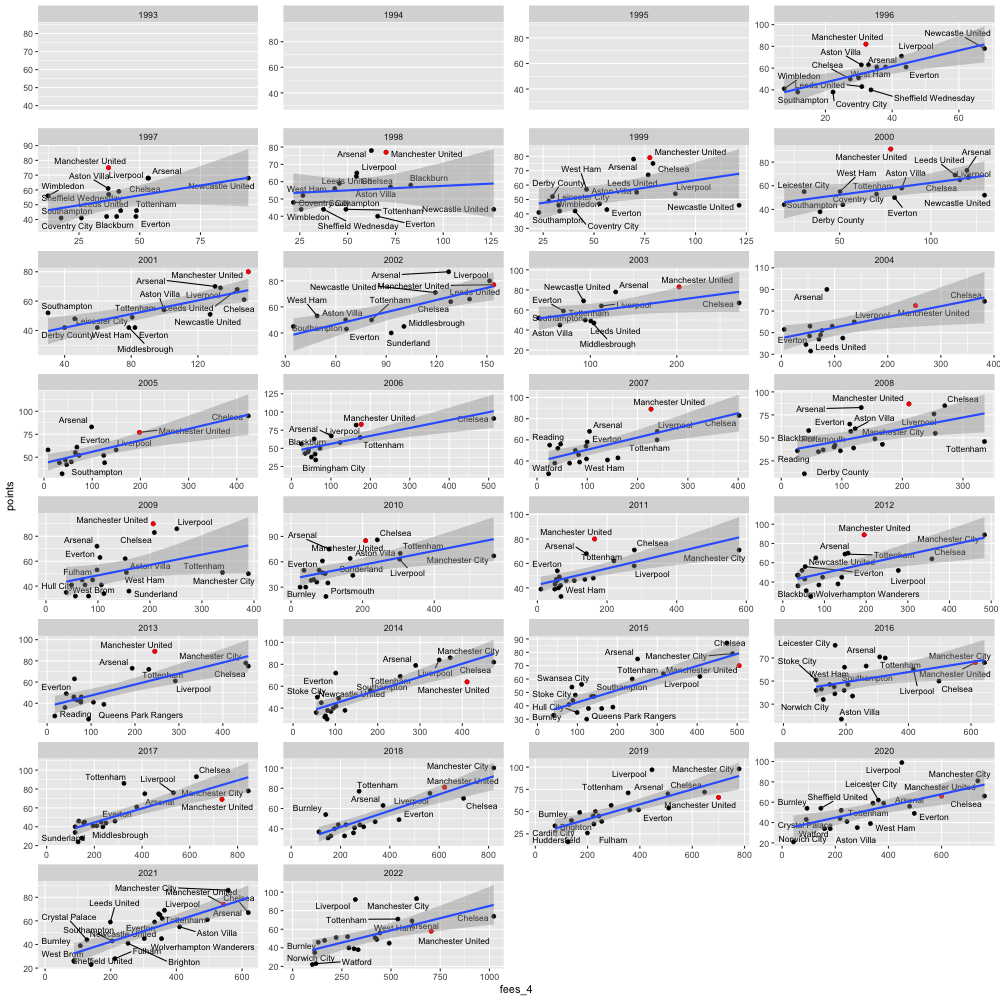

In [106]:
%%R -w 1000 -h 1000
# Exploratory data analysis

require('ggrepel')

ggplot(df) +
    aes(x=fees_4, y=points) +
    geom_point() +
    geom_text_repel(aes(label=club_name), size=3) +
    geom_point(data = df %>% filter(club_name == "Manchester United"), color='red') +
    geom_smooth(method='lm') +
    facet_wrap(~year, ncol=4, scales='free') 


In [117]:
%%R -o df_without_na

# loop through each year and fit a linear model
df_without_na <- df %>% 
            filter(!is.na(fees_4)) %>% 
            filter(!is.na(points)) 

In [118]:
df_without_na

,club_name,year,fees,points,fees_4,points_4_avg
1,Arsenal,1996,6.110,63.0,32.920,60.25
2,Arsenal,1997,22.025,68.0,53.665,63.25
3,Arsenal,1998,15.950,78.0,62.435,65.00
4,Arsenal,1999,25.400,78.0,69.485,71.75
5,Arsenal,2000,56.300,73.0,119.675,74.25
...,...,...,...,...,...,...
470,Wolverhampton Wanderers,2012,15.330,25.0,67.045,NaN
471,Wolverhampton Wanderers,2019,116.700,57.0,290.160,NaN
472,Wolverhampton Wanderers,2020,87.589,59.0,341.649,NaN
473,Wolverhampton Wanderers,2021,37.600,45.0,354.639,NaN


In [119]:
%%R -o df_r_squared,df_years

# create empty dataframe
df_r_squared <- data.frame(
    year = integer(), 
    r_squared = numeric(),
    pvalue = numeric()
    )

df_years <- data.frame(
    club_name = character(),
    year = integer(),
    fees = numeric(),
    points = numeric(),
    fees_4 = numeric(),
    points_4_avg = numeric(),
    residuals = numeric(),
    residuals_z = numeric()
)

for (y in unique(df_without_na$year)) {

    df_year <- df_without_na %>%
                filter(year == y)

    # fit linear model
    model <- lm(points ~ fees_4, data = df_year)
    
    # get r-squared
    r_sqared <- summary(model)$r.squared

    # get pvalue of model
    pval <- summary(model)$coefficients[2,4]

    # add to df_r_squared
    df_r_squared <- df_r_squared %>% add_row(year = y, r_squared = r_sqared, pvalue=pval)

    #### ADD RESIDUALS TO df_year
    df_year <- df_year %>% 
        mutate(
            residuals = residuals(model),
            residuals_z = (residuals - mean(residuals)) / sd(residuals)
        )

    # add df_year to df_years
    df_years <- df_years %>% add_row(df_year)
}


## THESE ARE THE DFS WE JUST MADE
# df_r_squared
# df_years

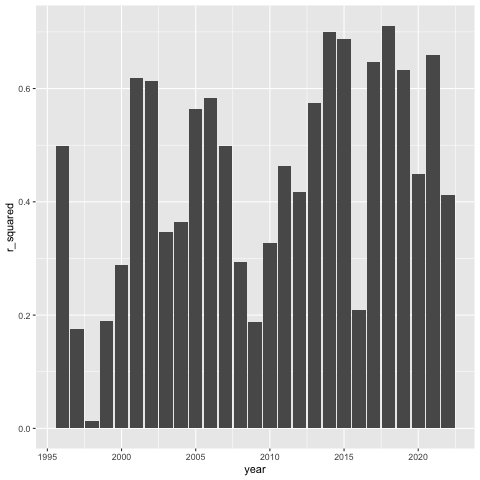

In [120]:
%%R 

ggplot(df_r_squared) + 
    aes(x=year, y=r_squared) +
    geom_col()

In [121]:
df_years

,club_name,year,fees,points,fees_4,points_4_avg,residuals,residuals_z
1,Arsenal,1996,6.110,63.0,32.920,60.25,6.620807,0.647881
2,Aston Villa,1996,8.100,63.0,30.757,60.50,8.204675,0.802871
3,Blackburn,1996,0.000,61.0,38.030,76.25,0.878984,0.086013
4,Chelsea,1996,15.565,50.0,27.435,52.75,-2.362774,-0.231210
5,Coventry City,1996,8.000,38.0,22.275,49.00,-10.584338,-1.035734
...,...,...,...,...,...,...,...,...
470,Southampton,2022,143.650,40.0,285.550,43.50,-7.498327,-0.505361
471,Tottenham,2022,177.900,71.0,534.800,65.75,10.385622,0.699955
472,Watford,2022,18.810,23.0,118.310,NaN,-15.697812,-1.057978
473,West Ham,2022,194.000,56.0,443.000,53.00,0.216328,0.014580


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


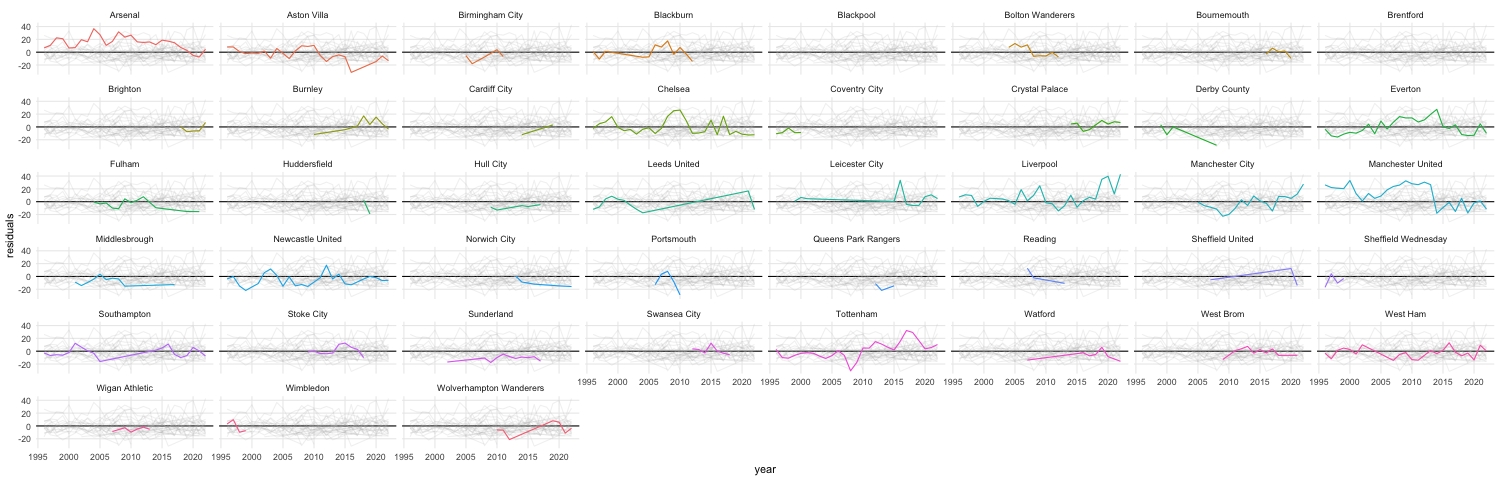

In [123]:
%%R -w 1500

background_data <- df_years %>% 
    mutate(club_name_2 = club_name) %>%
    select(-club_name)


ggplot(df_years) +
    aes(x=year, y=residuals, color=club_name) +
    geom_hline(aes(yintercept=0)) +
    geom_line(data = background_data, aes(group=club_name_2), color='grey', alpha=.2) +
    geom_line() +
    facet_wrap(~club_name, ncol=8) +
    theme_minimal() +
    theme(
        legend.position = "none",
        panel.grid.minor = element_blank(),
    ) 



In [177]:
# To do next

- run regressions for each year y=points_4_avg , x=fees_4
- look at r^2 of those for each year and p-values
- residuals for each club over time


SyntaxError: invalid syntax (2142448683.py, line 3)